# Informe Estadístico Python

Pepe Barbero, Andreu Picornell y Carlos Portillo

Este dataset proporciona información detallada sobre coches usados en venta en distintas ciudades de la India. Contiene datos relevantes que incluyen la marca y modelo del vehículo, el año de fabricación, el tipo de combustible, el tipo de transmisión, la cantidad de kilómetros recorridos, la potencia del motor, y el precio tanto de coches nuevos como usados, entre otros atributos importantes. La estructura del dataset es la siguiente:

* **S.No.**: Número de serie.
* **Name**: Nombre del coche que incluye la marca y el modelo.
* **Location**: La ubicación en la que se está vendiendo o está disponible para la compra (ciudades).
* **Year**: Año de fabricación del coche.
* **Kilometers_driven**: El total de kilómetros recorridos por el coche por el/los dueño(s) anterior(es) en KM.
* **Fuel_Type**: El tipo de combustible que usa el coche (Gasolina, Diésel, Eléctrico, CNG, LPG).
* **Transmission**: El tipo de transmisión que usa el coche (Automático/Manual).
* **Owner**: Tipo de propiedad.
* **Mileage**: El kilometraje estándar ofrecido por la empresa del coche en kmpl o km/kg.
* **Engine**: El volumen de desplazamiento del motor en CC.
* **Power**: La potencia máxima del motor en bhp.
* **Seats**: El número de asientos en el coche.
* **New_Price**: El precio de un coche nuevo del mismo modelo en INR Lakhs (1 Lakh = 100,000).
* **Price**: El precio del coche usado en INR Lakhs (1 Lakh = 100,000).

Este conjunto de datos es ideal para el análisis y la construcción de modelos de predicción que permitan estimar el precio de un coche usado basándose en sus características.Dicho análisis nos facilita una mejor comprensión y evaluación del valor de mercado de los coches de segunda mano.

In [2]:
import pandas as pd

# Lee el archivo TSV
df = pd.read_csv('used_cars_data.csv', sep=",", encoding="latin8")

# Muestra las primeras filas
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


# Mostrar los 5 primeras filas de Nombre y Marca

In [3]:
# Extraer la primera palabra de la columna 'Name' como la marca del coche
df['Brand'] = df['Name'].apply(lambda x: x.split()[0])

# Mostrar las primeras filas con la nueva columna 'Brand'
df[['Name', 'Brand']].head()


,Name,Brand
0,Maruti Wagon R LXI CNG,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai
2,Honda Jazz V,Honda
3,Maruti Ertiga VDI,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Audi


# Sacar la media del precio

In [5]:
df.loc[:, 'Price'].dropna().mean()

9.47946835022429

Hacemos .describe() para obtener

In [6]:
df.loc[:, 'Price'].dropna().describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

# Saca el Box-Whiskers

<Axes: >

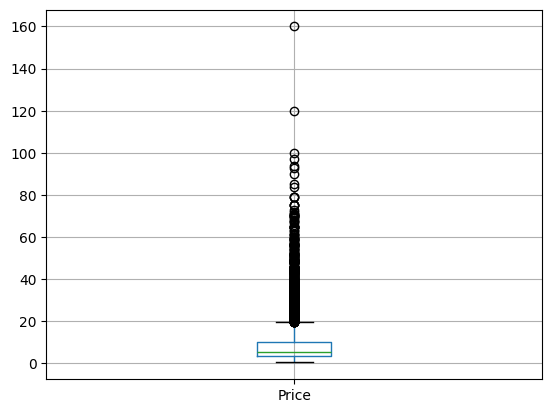

In [ ]:
df.boxplot(column=['Price'])

Describir que es lo que vemos en la gráfica, además añadimos una mención a los datos optenidos en el punto anterior

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Name: count, dtype: int64


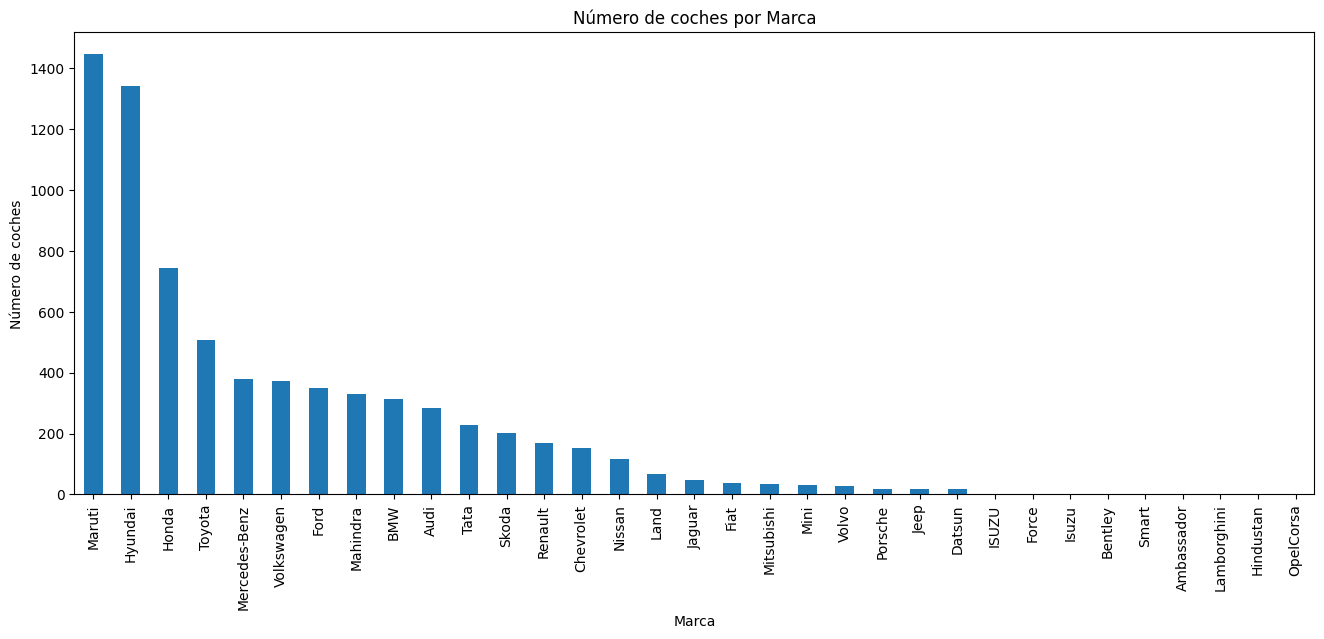

In [7]:
import matplotlib.pyplot as plt

brand_counts = df['Brand'].value_counts()
print(brand_counts.head())

brand_counts.plot(kind='bar', figsize=(16, 6))
plt.title('Número de coches por Marca')
plt.xlabel('Marca')
plt.ylabel('Número de coches')
plt.xticks(rotation=90)
plt.show()


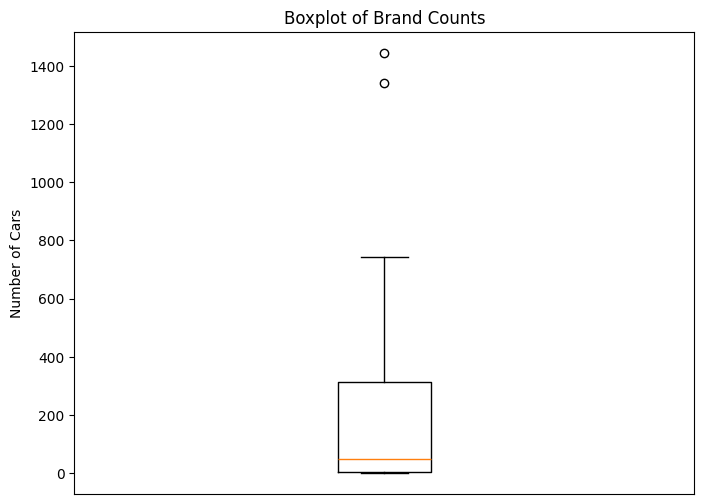

In [8]:
import matplotlib.pyplot as plt

# Extract values from the brand_counts Series
brand_counts_values = brand_counts.values

# Create the boxplot using matplotlib directly
plt.figure(figsize=(8, 6))
plt.boxplot(brand_counts_values)
plt.title('Boxplot of Brand Counts')
plt.ylabel('Number of Cars')
plt.xticks([])  # Remove x-axis ticks since they are not relevant here
plt.show()

# MATRIZ DE CORRELACIÓN

In [ ]:
df['power'] = df['Power'].str.extract('(\d+)').astype(float)

selected_columns = df[['Price', 'Year','Kilometers_Driven', 'power']]
corr_matrix = selected_columns.corr(method='pearson')
corr_matrix


,Price,Year,Kilometers_Driven,power
Price,1.000000,0.305327,-0.011493,0.772480
Year,0.305327,1.000000,-0.187859,0.012439
Kilometers_Driven,-0.011493,-0.187859,1.000000,0.030463
power,0.772480,0.012439,0.030463,1.000000


En esta parte se ha realizado una matriz de correlación de la que podemos extraer las siguientes conclusiones:

* **Price vs. power (0.772)**

Existe una correlación positiva alta entre el precio y la potencia (power). Esto sugiere que, en general, a mayor potencia del vehículo, mayor es el precio. Este resultado es lógico, ya que los vehículos con motores más potentes suelen tener un precio más alto debido a su mejor desempeño y características avanzadas.

* **Price vs. Year (0.305)** -> Hacer una comparación por antigüedad

La correlación positiva moderada entre el precio y el año del vehículo sigue presente, indicando que los vehículos más nuevos tienden a tener un precio más alto, aunque otros factores también podrían influir en esta relación.

* **Price vs. Kilometers_Driven (-0.011)**

La correlación entre el precio y los kilómetros recorridos sigue siendo muy baja, lo que implica que en tu conjunto de datos, la cantidad de kilómetros recorridos no es un factor significativo para el precio del vehículo.


# Saca la distribución del precio

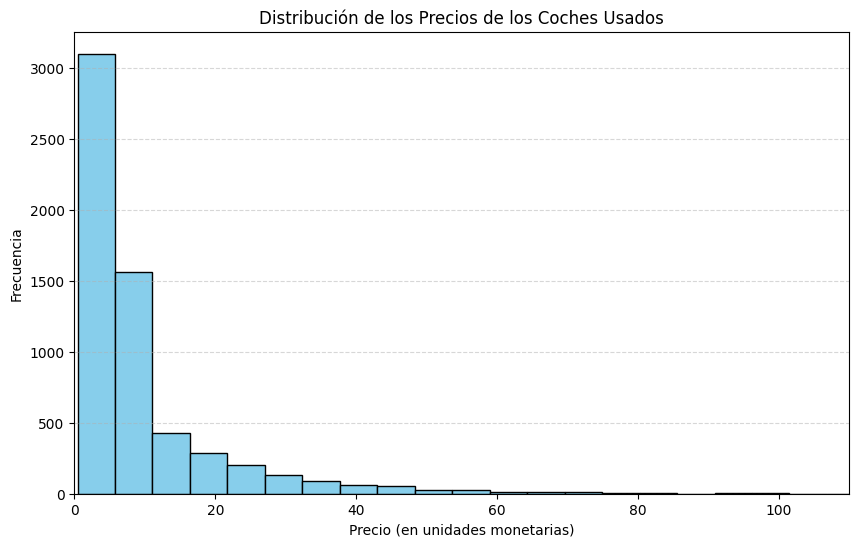

In [ ]:
import matplotlib.pyplot as plt

# Limpiar los datos eliminando valores nulos de la columna 'Price'
prices = df['Price'].dropna()

# Graficar un histograma de la columna 'Price'
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de los Precios de los Coches Usados')
plt.xlabel('Precio (en unidades monetarias)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(0, 110)
plt.show()


Calcula la distribución que más se ajusta

In [ ]:
from scipy import stats

dist_names = ['norm', 'expon', 'gamma']
best_fit = {}
prices = df['Price'].dropna()

for dist_name in dist_names:
    dist = getattr(stats, dist_name)
    param = dist.fit(prices)
    best_fit[dist_name] = stats.kstest(prices, dist_name, args=param).statistic

print("Mejor ajuste:", min(best_fit, key=best_fit.get))

Mejor ajuste: expon


Sabiendo que la distribución del precio es exponencial calcula la probabilidad de que la variable tome un valor menor a 3

In [ ]:
from scipy.stats import expon

# Parámetro de la distribución (1/lambda)
beta = 2  # media de la distribución exponencial

# Calcular la probabilidad de que la variable tome un valor <= x
x = 3  # ejemplo de valor
probabilidad = expon.cdf(x, scale=beta)

print(f"La probabilidad de que la variable tome un valor menor o igual a {x} es: {probabilidad:.4f}")

La probabilidad de que la variable tome un valor menor o igual a 3 es: 0.7769


# Distribución de los caballos de los coches

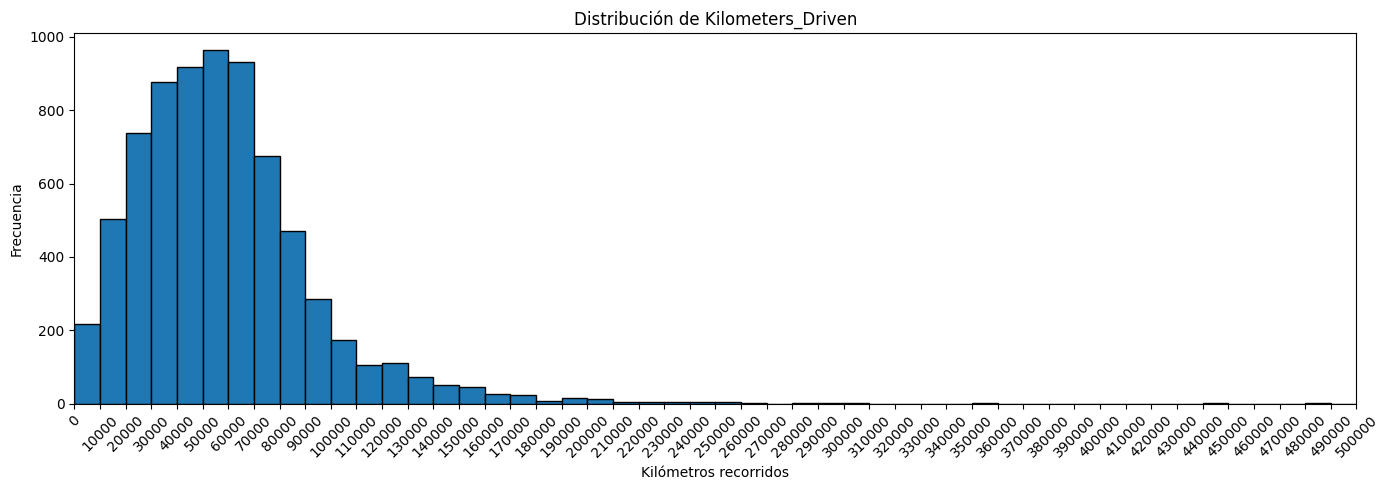

In [9]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.arange(0, 500000 + 10000, 10000)

plt.figure(figsize=(14, 5))
plt.hist(df['Kilometers_Driven'], bins=bins, edgecolor='black')
plt.title('Distribución de Kilometers_Driven')
plt.xlabel('Kilómetros recorridos')
plt.ylabel('Frecuencia')
plt.xlim(0, 500000)  # Limitar el eje x a 500,000 km
plt.xticks(bins, rotation=45)  # Configurar las etiquetas del eje x para cada 10,000 km

plt.tight_layout()
plt.show()


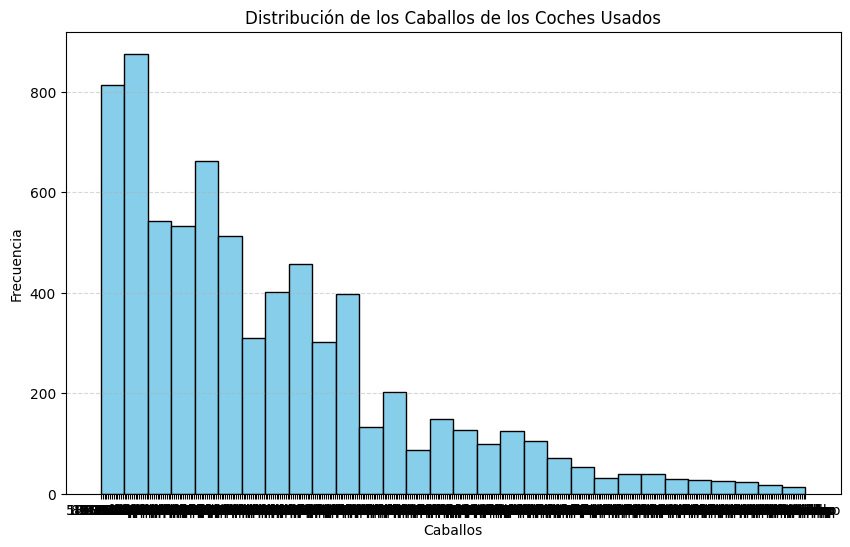

In [10]:
# Limpiar los datos eliminando valores nulos de la columna 'Price'
prices = df['Power'].dropna()

# Graficar un histograma de la columna 'Price'
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de los Caballos de los Coches Usados')
plt.xlabel('Caballos')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Distribución de los km de los coches

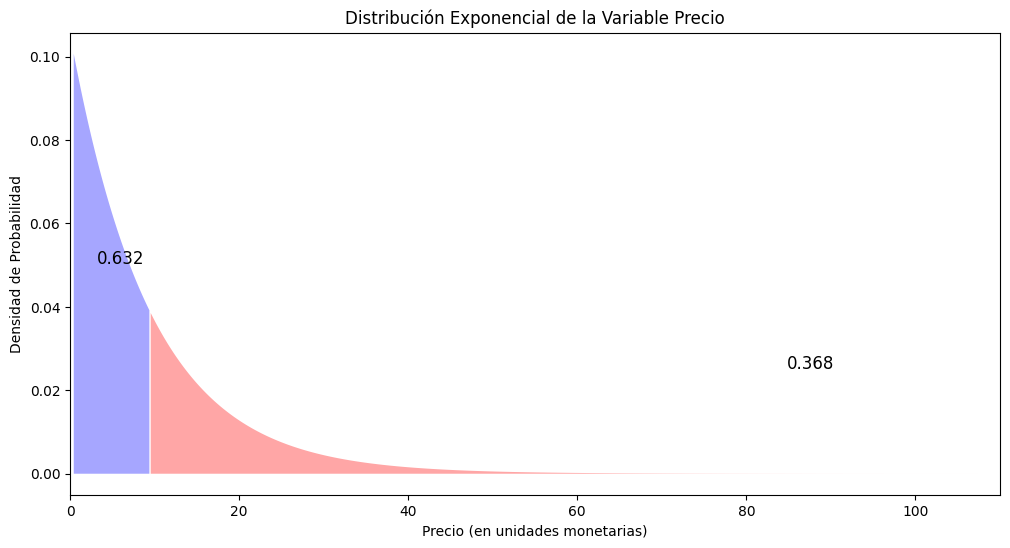

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Ajustar una distribución exponencial a la variable 'Price'
precio = df['Price'].dropna()  # Eliminar valores nulos para evitar errores
lambda_param = 1 / precio.mean()  # Parámetro de la distribución exponencial (1/media)

# Definir los rangos de la gráfica
x = np.linspace(0.440000, precio.max(), 1000)

# Calcular la función de densidad de probabilidad (PDF) de la distribución exponencial
pdf = lambda_param * np.exp(-lambda_param * x)

# Graficar las áreas
plt.figure(figsize=(12, 6))

# Calculate the where condition separately to ensure it matches the shape of x
where_below_mean = x <= precio.mean()

# Use the where condition in fill_between
plt.fill_between(x=x,  # Use the full x array
                 y1=pdf,  # Use the full pdf array
                 where=where_below_mean,  # Apply the where condition for below mean
                 facecolor='blue',
                 alpha=0.35)

# Similarly for above mean
where_above_mean = x > precio.mean()
plt.fill_between(x=x,
                 y1=pdf,
                 where=where_above_mean,
                 facecolor='red',
                 alpha=0.35)

# Agregar texto a la gráfica
prob_1 = stats.expon.cdf(precio.mean(), scale=1/lambda_param)
plt.text(x=precio.mean()/3, y=pdf.max()/2, s=f"{round(prob_1, 3)}", fontsize=12)
plt.text(x=precio.mean() + (precio.max() - precio.mean())/2, y=pdf.max()/4, s=f"{round(1 - prob_1, 3)}", fontsize=12)

# Personalizar la gráfica
plt.title('Distribución Exponencial de la Variable Precio')
plt.xlabel('Precio (en unidades monetarias)')
plt.ylabel('Densidad de Probabilidad')
plt.xlim(0,110)
plt.show()
